In [1]:
## Laden von der verschieden Bibliothek zur Daten Visualizierung und Vorhersagen
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import rmsprop
from keras import backend as ker
from math import sqrt
import tensorflow as tf




/home/jupyter/anaconda3/envs/jupyter/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
## Laden von Dataset
df = pd.read_csv("weekly-train.csv", skiprows=0, index_col =0)

Weekly_train_Finance = df[59:223]
Weekly_train_Other = df[:12]
Weekly_train_Industry = df[53:59]
Weekly_train_Demographic = df[223:247]
Weekly_train_Micro = df[247:359]
Weekly_train_Macro = df[12:53]

Dataset = Weekly_train_Finance.T.iloc[:,:]
print (Dataset.shape)


(2597, 164)


In [8]:
Dataset.describe()

V1,W60,W61,W62,W63,W64,W65,W66,W67,W68,W69,...,W214,W215,W216,W217,W218,W219,W220,W221,W222,W223
count,2284.000000,1705.000000,2179.000000,2179.000000,2178.000000,2178.000000,2178.000000,1311.000000,653.000000,504.000000,...,934.000000,934.000000,934.000000,446.000000,457.000000,578.000000,432.000000,1087.000000,1087.000000,1207.000000
mean,9436.334584,2717.918651,3713.456769,3001.244057,4039.931589,6641.476584,1837.877319,5550.491228,4814.400199,5883.770377,...,1326.673448,1740.426542,2194.068148,9571.320529,9724.585729,1059.190311,1801.150463,4466.484545,2919.712511,5899.144159
std,1437.410426,2386.333510,1759.315671,1347.136944,2601.405122,3747.131186,1983.641748,2379.231319,2954.727793,2510.941816,...,669.975321,390.415730,519.629646,747.024227,581.670747,78.105881,26.802068,1823.801315,1654.542692,8021.628713
min,6814.670000,300.900000,644.100000,644.100000,1983.000000,1988.000000,135.900000,2423.000000,808.720000,1620.320000,...,332.200000,1219.870000,1311.500000,7000.000000,7000.000000,686.000000,1456.000000,1676.400000,1008.700000,441.000000
25%,8475.930000,893.200000,2259.400000,1949.250000,2625.500000,4170.500000,430.800000,3811.000000,1781.430000,3271.615000,...,582.325000,1401.770000,1613.740000,9800.000000,9900.000000,1064.000000,1792.000000,2686.950000,1766.950000,841.000000
50%,9328.520000,2179.300000,4091.200000,3177.700000,3149.000000,6008.500000,790.450000,4701.000000,4962.530000,7213.960000,...,1502.450000,1628.410000,2349.180000,9872.784500,9923.810000,1078.000000,1806.000000,4518.000000,2213.100000,1484.000000
75%,10254.832500,3304.700000,5081.800000,3653.300000,3906.750000,7429.000000,2790.975000,6912.000000,7617.200000,7791.150000,...,1912.450000,2121.197500,2605.345000,9895.947750,9940.810000,1085.000000,1813.000000,5469.700000,3628.000000,6479.000000
max,14641.010000,11541.900000,8084.300000,6665.100000,14878.000000,20439.000000,7593.000000,13381.000000,9839.150000,9859.410000,...,3045.200000,2559.590000,3151.950000,9965.328000,9980.000000,1093.000000,1850.000000,9818.900000,8478.300000,28738.000000


In [9]:
def remov_nan (dataset):
    n = dataset.isnull().sum() 
    data = dataset[0:(len(dataset)-n)]
    return data

In [10]:
def normalisieren_data(dataset):
    '''
    to normalize Data
    : dataset : Data to normalize
    ''' 
    scaler = Normalizer().fit(dataset)
    Dataset_normalized = scaler.transform(dataset)
    return Dataset_normalized[0]


In [11]:
def standardisieren_data(dataset):
    '''
    to standardize Data (Data transformation)
    : dataset : Data to standardize
    ''' 
    scaler = StandardScaler().fit(dataset)
    Dataset_stand = scaler.transform(dataset)
    return Dataset_stand


In [12]:
#=================== Preprocessing Funktionen der Benchmark =========================#

In [13]:
## BENCHMARK ##
def detrend(insample_data):
    """
    Calculates a & b parameters of LRL
    :param insample_data:
    :return:
    """
    x = np.arange(len(insample_data))
    a, b = np.polyfit(x, insample_data, 1)
    return a, b

In [14]:
## BENCHMARK ##
def deseasonalize(original_ts, ppy):
    """
    Calculates and returns seasonal indices
    :param original_ts: original data
    :param ppy: periods per year
    :return:
    """
    """
    # === get in-sample data
    original_ts = original_ts[:-out_of_sample]
    """
    if seasonality_test(original_ts, ppy):
        # print("seasonal")
        # ==== get moving averages
        ma_ts = moving_averages(original_ts, ppy)
        # ==== get seasonality indices
        le_ts = original_ts * 100 / ma_ts
        le_ts = np.hstack((le_ts, np.full((ppy - (len(le_ts) % ppy)), np.nan)))
        le_ts = np.reshape(le_ts, (-1, ppy))
        si = np.nanmean(le_ts, 0)
        norm = np.sum(si) / (ppy * 100)
        si = si / norm
    else:
        # print("NOT seasonal")
        si = np.full(ppy, 100)
    return si

In [15]:
## BENCHMARK ##
def moving_averages(ts_init, window):
    """
    Calculates the moving averages for a given TS
    :param ts_init: the original time series
    :param window: window length
    :return: moving averages ts
    """
    if len(ts_init) % 2 == 0:
        ts_ma = ts_init.rolling(window=1,center=True).mean()

        ts_ma = ts_ma.rolling(2,center=True).mean()

        ts_ma = np.roll(ts_ma, -1)
    else:
        ts_ma = ts_init.rolling(window=1,center=True).mean()

    return ts_ma

In [16]:
## BENCHMARK ##
def seasonality_test(original_ts, ppy):
    """
    Seasonality test
    :param original_ts: time series
    :param ppy: periods per year
    :return: boolean value: whether the TS is seasonal
    """
    s = acf(original_ts, 1)
    for i in range(2, ppy):
        s = s + (acf(original_ts, i) ** 2)
    limit = 1.645 * (sqrt((1 + 2 * s) / len(original_ts)))
    return (abs(acf(original_ts, ppy))) > limit

In [17]:
## BENCHMARK ##
def acf(data, k):
    """
    Autocorrelation function
    :param data: time series
    :param k: lag
    :return:
    """
    m = np.mean(data)
    s1 = 0
    for i in range(k, len(data)):
        s1 = s1 + ((data[i] - m) * (data[i - k] - m))
    s2 = 0
    for i in range(0, len(data)):
        s2 = s2 + ((data[i] - m) ** 2)
    return float(s1 / s2)

In [18]:
def split_input_output(dataset: np.ndarray, in_back: int=1) -> (np.ndarray, np.ndarray):
    """ 
    The function takes two arguments: the `dataset`, which is a NumPy array that we want to convert into a dataset,
    and the `in_back`, which is the number of previous time steps to use as input variables
    to predict the next time period — in this case defaulted to 1.
    :dataset: numpy dataset
    :in_variable: number of previous time steps as int
    :return: tuple of input and output dataset
    """
    Input, Output = [], []
    for i in range(len(dataset)-in_back):
        a = dataset[i:(i+in_back)]
        Input.append(a)
        Output.append(dataset[i + in_back])
    return np.array(Input), np.array(Output)

In [19]:
def split_into_train_test(dataset: np.ndarray,train_size, in_back) -> (np.ndarray, np.ndarray):
    """
    Splits dataset into training and test datasets. 
    : dataset: (np.ndarray) Time serie Dataset 
    : train_size: (int) Größe der Training Datamenge
    : look_back: (int) number of previous time steps 
    :return: tuple of training data and test dataset
    """
    if not train_size > in_back:
        raise ValueError('train_size muss größer als look_back')
    train= dataset[0:train_size]
    test = dataset[train_size - in_back:len(dataset)]
    #print('train_dataset: {}, test_dataset: {}'.format(len(train), len(test)))
    return train, test

In [20]:
def all_split (dataset: np.ndarray,fh, in_back) -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    """
    Splits dataset into input-training (X_train), outout_training(Y_train) and input_test(X_test) , output_test(Y_test) datasets.
    : dataset:(np.ndarray) Time serie Dataset
    :df:(float64) Größe der Testing Datamenge 
    : in_back: (int) number of previous time steps 
    :return: x_train, y_train, x_test, y_test
    """
    #if not (size_prozent>0 and size_prozent<1):
        #raise ValueError('size_prozent of training must be in the interval 0 and 1')
    train_size = len(dataset)-fh
    training, testing = split_into_train_test(dataset,train_size,in_back)
    X_train, Y_train = split_input_output(training,in_back)
    X_test, Y_test = split_input_output(testing,in_back)
    return X_train,Y_train,X_test[0].reshape(1,-1),Y_test

In [21]:
## BENCHMARK ##
def smape(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item() 

##===Mean Absolute Scaled Error ====##
def mase(insample, y_test, y_hat_test, freq):
    """
    Calculates MAsE
    :param insample: insample data
    :param y_test: out of sample target values
    :param y_hat_test: predicted values
    :param freq: data frequency
    :return:
    """
    y_hat_naive = []
    for i in range(freq, len(insample)):
        y_hat_naive.append(insample[(i - freq)])
    masep = np.mean(abs(insample[freq:] - y_hat_naive))
    return np.mean(abs(y_test - y_hat_test)) / masep

In [22]:
def plot_prediction(y_test,y_predict):
    '''
    this function plots the true values and the predicted value in order 
    to compare them.
    : y_test:    true values 
    : y_predict:  predicted values
    : return:  plot
    '''
    Y_predd = pd.DataFrame({'Y_pred' : y_predict,
                        'Y_test' : y_test})
    Y_predd.plot(figsize=(20, 8))
    pyplot.show()  

In [23]:
def check_pred (dataset: pd.DataFrame,y_pred: np.ndarray):
    ''''
    this function check the negativity of the predicted values, set them to null 
    if they are negativ and to max value of the serie data if they are extrem high
    : dataset: Dataset of the serie
    : y_pred:  The list of predicted values
    : return:
    '''
    for i in range(len(y_pred)):
        if y_pred[i]<0:
            y_pred[i]=0
        if y_pred[i]> (9000*max(dataset)):
            y_pred[i]=max(dataset)

In [ ]:
##===================================BENCHMARK'S MODELS===========================================##

In [24]:
## BENCHMARK ##
def mlp_bench(x_train, y_train, x_test, fh):
    """
    Forecasts using a simple MLP which 6 nodes in the hidden layer
    :param x_train: train input data
    :param y_train: target values for training
    :param x_test: test data
    :param fh: forecasting horizon
    :return:
    """
    y_hat_test = []
    model = MLPRegressor(hidden_layer_sizes=6, activation='identity', solver='adam',
                         max_iter=100, learning_rate='adaptive', learning_rate_init=0.001,
                         random_state=42)
    model.fit(x_train, y_train)
    last_prediction = model.predict(x_test)[0]
    for i in range(0, fh):
        y_hat_test.append(last_prediction)
        x_test[0] = np.roll(x_test[0], -1)
        x_test[0, (len(x_test[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_test)[0]
    return np.asarray(y_hat_test)

In [ ]:
###==================================OUR MODELS ========================================##

In [25]:
# Die Verschiedene Model sind hier definieren. Alle basiert auf die Technique "Iteration" zur Vorhersage
#  Die Model "Linear_regression wird jetzt definieren
def LinReg_mod(x_train, y_train, x_test,forcast_horizon):
    '''
    This function return the prediction of x_test with 
    the model 'linear Regression'. The parameter 'normalize' of the model will be set on True
    : x_train: Input Training Dataset
    : y_train: Outpout Training Dataset
    : x_test: Input Testing Dataset
    : forcast_horizon: the horizon of forcasting
    '''
    y_predict = []
    # load of the model and setting of parameters
    model = LinearRegression(normalize=True)   #ARDRegression(compute_score=True)
    # Training of the model with x_train and y_train
    model.fit(x_train,y_train)
    # prediction of the model
    prediction_current = model.predict(x_test)[0]
    # Techniques of Iteration for the horizon forcasting
    for i in range(0, forcast_horizon):
        # add the first prediction to y_predict
        y_predict.append(prediction_current)
        # move the first element in x_test to the last position, in order to remove 
        x_test[0] = np.roll(x_test[0], -1)
        # set now the current_prediction value at the last position of x_test
        x_test[0][(len(x_test[0]) - 1)] = prediction_current
        prediction_current = model.predict(x_test)[0]
    return  np.asarray(y_predict) 

In [ ]:
def Dtree_Reg  (x_train, y_train, x_test, fh):
    y_predict = []
    # load of the model and setting of parameters
    model = DecisionTreeRegressor(max_depth=8)
    # Training of the model with x_train and y_train
    model.fit(x_train,y_train)
    # prediction of the model
    prediction_current = model.predict(x_test)[0]
    # Techniques of Iteration for the horizon forcasting
    for i in range(0, fh):
        # add the first prediction to y_predict
        y_predict.append(prediction_current)
        # move the first element in x_test to the last position, in order to remove 
        x_test[0] = np.roll(x_test[0], -1)
        # set now the current_prediction value at the last position of x_test
        x_test[0][(len(x_test[0]) - 1)] = prediction_current
        prediction_current = model.predict(x_test)[0]
    return  np.asarray(y_predict)  

In [ ]:
#===================PREDICTION FUNCTION =============================================##

In [51]:
### In Dieser Funktion wird es die Vorhersage mit Preprocessing und ohne preprocessing verglichen

def one_ts_pred_compare(data: pd.DataFrame,in_back):
    '''
    this function split a dataset of one serie into training and testing Dataset, 
    train a mondel on the training dataset and make prediction on the test data. 
    it calculate the evaluation metric sMAPE and MASE of the prediction-it plots
    also the true values and the predicted values
    : data:     Dataset of the serie
    : in_back:  number of input point use to forcaste
    : return:  Y_test, Y_predict, sMAPE, MASE of each used model
    '''
    fh = 13             # forcasting horizon must be 18 for weekly data
    freq = 1            # the frequence of weekly data is 1
    
    # ==== remove all Nan values from serie ====#
    new_Data = remov_nan (data)
   
    
    # ======= prediction without preprocessing
    x_train,y_train, x_test, y_test = all_split(new_Data, fh, in_back)
    Y = LinReg_mod(x_train, y_train, x_test,fh)
    YY = mlp_bench(x_train, y_train, x_test, fh)
    #YYY = np.reshape(rnn_bench(x_train, y_test, X_test, fh, in_back), (-1))
    
    
    # ==== remove seasonality ====#
    seasonality_in = deseasonalize(new_Data, freq)
    for i in range(0, len(new_Data)):
        new_Data[i] = new_Data[i] * 100 / seasonality_in[i % freq]

    # ==== detrending ====#
    a, b = detrend(new_Data)
    for i in range(0, len(new_Data)):
        new_Data[i] = new_Data[i] - ((a * i) + b)
    
    
    # ==== Split the dataset into x_train,y_train, x_test and y_test ====#
    X_train,Y_train, X_test, Y_test = all_split(new_Data, fh, in_back)

    # ==== forcasting with the models ====#
    
    Y_pred = LinReg_mod(X_train, Y_train, X_test,fh) 
    #y_hat_test_RNN = np.reshape(rnn_bench(X_train, Y_test, X_test, fh, in_back), (-1))
    y_hat_test_MLP = mlp_bench(X_train, Y_train, X_test, fh)
    

    
    # ==== add trend ====#
    for i in range(0, len(new_Data)):
        new_Data[i] = new_Data[i] + ((a * i) + b)
    
    for i in range(0, fh):
        Y_pred[i] = Y_pred[i] + ((a * (len(new_Data) + i + 1)) + b)
        y_hat_test_MLP[i] = y_hat_test_MLP[i] + ((a * (len(new_Data) + i + 1)) + b)
       # y_hat_test_RNN[i] = y_hat_test_RNN[i] + ((a * (len(new_Data) + i + 1)) + b)

    # ==== add seasonality ====#
    for i in range(0, len(new_Data)):
        new_Data[i] = new_Data[i] * seasonality_in[i % freq] / 100
    
    for i in range(len(new_Data), len(new_Data) + fh):
        Y_pred[i - len(new_Data)] = Y_pred[i - len(new_Data)] * seasonality_in[i % freq] / 100
        y_hat_test_MLP[i - len(new_Data)] = y_hat_test_MLP[i - len(new_Data)] * seasonality_in[i % freq] / 100
       # y_hat_test_RNN[i - len(new_Data)] = y_hat_test_RNN[i - len(new_Data)] * seasonality_in[i % freq] / 100
       

    # ==== check of the predicted values (Negativity and Extremity) ====#
    
    check_pred(new_Data,Y)
    check_pred(new_Data,YY)
   # check_pred(new_Data,YYY)
    
    check_pred(new_Data,Y_pred)
    check_pred(new_Data,y_hat_test_MLP)
    #check_pred(new_Data,y_hat_test_RNN)
   
    
    
    # ===== evaluation of the prediction for each model ====#
    
    
    Y_pred_mase = mase(new_Data[:-fh],y_test,Y_pred,freq)
    Y_pred_smape = smape(y_test,Y_pred)
    
    MLP_mase = mase(new_Data[:-fh],y_test,y_hat_test_MLP ,freq)
    MLP_smape = smape(y_test,y_hat_test_MLP )
    
   # RNN_mase = mase(new_Data[:-fh],y_test,y_hat_test_RNN  ,freq)
   # RNN_smape = smape(y_test,y_hat_test_RNN)
    
    Y_mase = mase(new_Data[:-fh],y_test,Y,freq)
    Y_smape = smape(y_test,Y)
    
    YY_mase = mase(new_Data[:-fh],y_test,YY,freq)
    YY_smape = smape(y_test,YY)
    
   # YYY_mase = mase(new_Data[:-fh],y_test,YYY,freq)
   # YYY_smape = smape(y_test,YYY)
    
    
    # === print of Evaluation´s results and plotting ====#
    
    # Verglich between Preprocessing and no Preprocessing
    print("#===Comparison of our Model between 'with preprocessing' and 'no preprocessing'=====#","\n")
    print("** WITH PREPROCESSING (TREND AND SAISONNALITY) **","\n\n")
    print(" Y_pred_mase =  ",Y_pred_mase)
    print(" Y_pred_smape =  ",Y_pred_smape, "\n\n")
    
    print("** NO PREPROCESSING **","\n\n")
    print(" Y_pred_mase =  ",Y_mase)
    print(" Y_pred_smape =  ",Y_smape, "\n\n")
    
    Y_predd = pd.DataFrame({'Y_pred_with_preproc' : Y_pred,
                            'Y_pred_no_preproc' : Y,
                        'Y_test' : y_test})
    Y_predd.plot(figsize=(20, 8))
    pyplot.show()  
    
    # Vergleich of our model with the Benchmark
    print("##=====  Comparison between our model and the Benchmark model =====##")
    print("** WITH PREPROCESSING (TREND AND SAISONNALITY) **","\n\n")
    print("Our Model:    ","Y_pred_mase = ",Y_pred_mase,"      ","Y_pred_smape = ",Y_pred_smape,"\n" )
    print("MPL Benchmark:   ","MLP_mase = ",MLP_mase,"      ","MLP_smape = ",MLP_smape,"\n" )
   # print("RNN Benchmark:   ","RNN_mase = ",RNN_mase,"      ","RNN_smape = ",RNN_smape,"\n" )
    
    Y_predd0 = pd.DataFrame({'Our Model' : Y_pred,
                            'MPL_BENCHMARK' : y_hat_test_MLP,
                          #  'RNN_BENCHMARK' : y_hat_test_MLP,
                        'Y_test' : y_test})
    Y_predd0.plot(figsize=(20, 8))
    pyplot.show()  
    
    print("** NO PREPROCESSING **","\n\n")
    print("Our Model:    ","Y_pred_mase = ",Y_mase,"      ","Y_pred_smape = ",Y_smape,"\n" )
    print("MPL Benchmark:   ","MLP_mase = ",YY_mase,"      ","MLP_smape = ",YY_smape,"\n" )
   # print("RNN Benchmark:   ","RNN_mase = ",YYY_mase,"      ","RNN_smape = ",YYY_smape,"\n" )
    
    Y_predd1 = pd.DataFrame({'Our Model' : Y,
                            'MPL_BENCHMARK' : YY,
                           # 'RNN_BENCHMARK' : YYY,
                        'Y_test' : y_test})
    Y_predd1.plot(figsize=(20, 8))
    pyplot.show()  
    


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#===Comparison of our Model between 'with preprocessing' and 'no preprocessing'=====# 

** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


 Y_pred_mase =   1.1831266859278804
 Y_pred_smape =   0.007429310008328608 


** NO PREPROCESSING ** 


 Y_pred_mase =   0.7901537849487859
 Y_pred_smape =   0.004951190555702557 




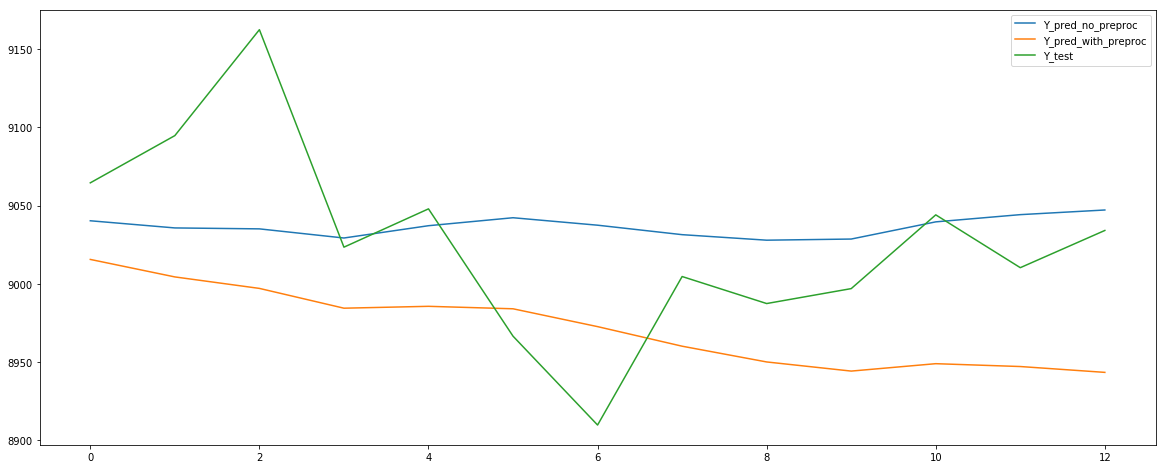

##=====  Comparison between our model and the Benchmark model =====##
** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


Our Model:     Y_pred_mase =  1.1831266859278804        Y_pred_smape =  0.007429310008328608 

MPL Benchmark:    MLP_mase =  3.0971869837942405        MLP_smape =  0.019599964399239316 



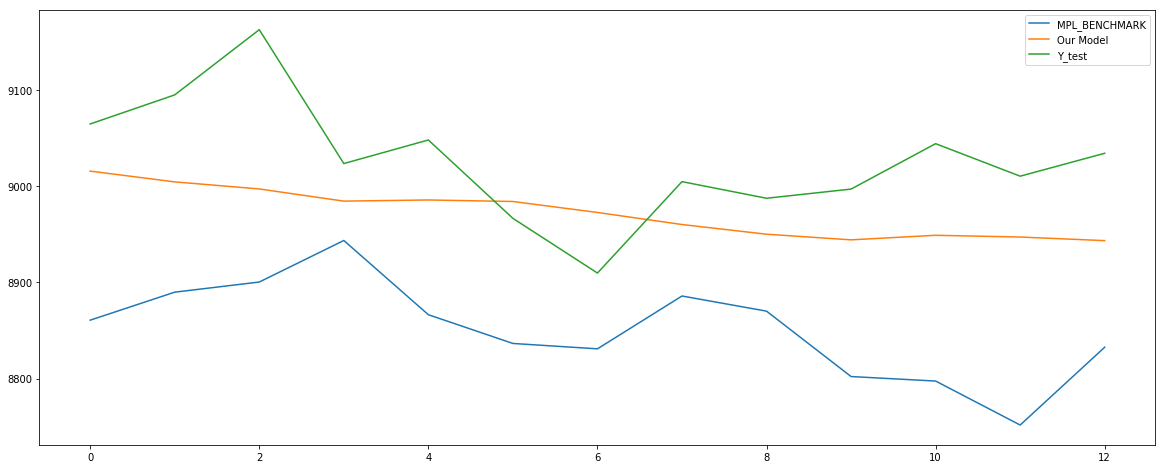

** NO PREPROCESSING ** 


Our Model:     Y_pred_mase =  0.7901537849487859        Y_pred_smape =  0.004951190555702557 

MPL Benchmark:    MLP_mase =  1.807879492105042        MLP_smape =  0.01133587908297854 



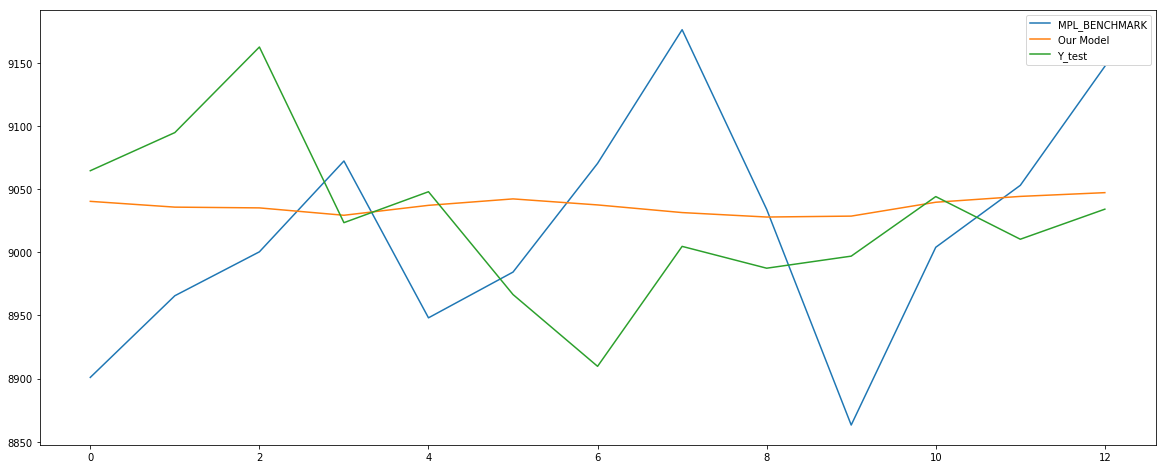

In [39]:
zt = Dataset.iloc[:,0]

one_ts_pred_compare(zt,20)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#===Comparison of our Model between 'with preprocessing' and 'no preprocessing'=====# 

** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


 Y_pred_mase =   2.3252219960311282
 Y_pred_smape =   0.0271844952692443 


** NO PREPROCESSING ** 


 Y_pred_mase =   2.107337635776407
 Y_pred_smape =   0.024596190808461236 




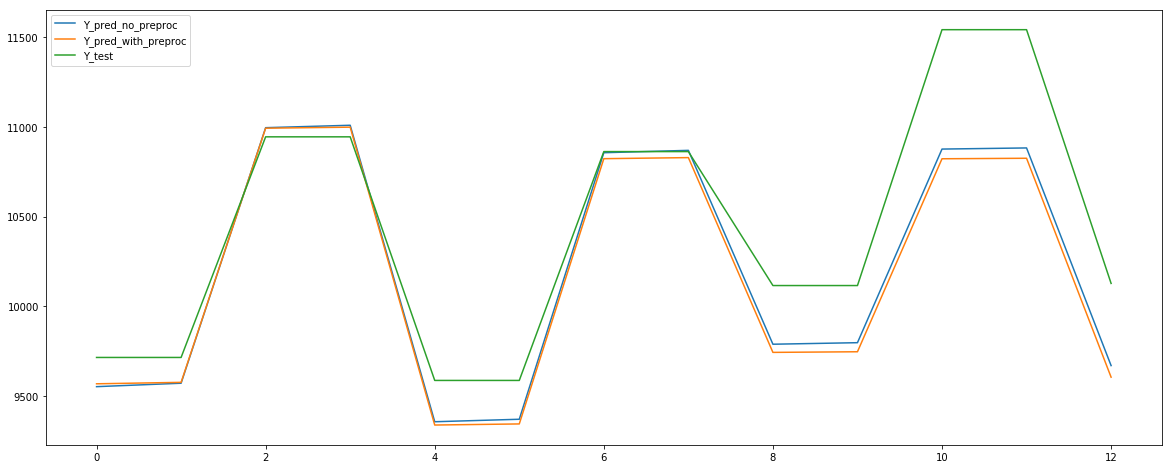

##=====  Comparison between our model and the Benchmark model =====##
** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


Our Model:     Y_pred_mase =  2.3252219960311282        Y_pred_smape =  0.0271844952692443 

MPL Benchmark:    MLP_mase =  4.50868152193284        MLP_smape =  0.053570786033881386 



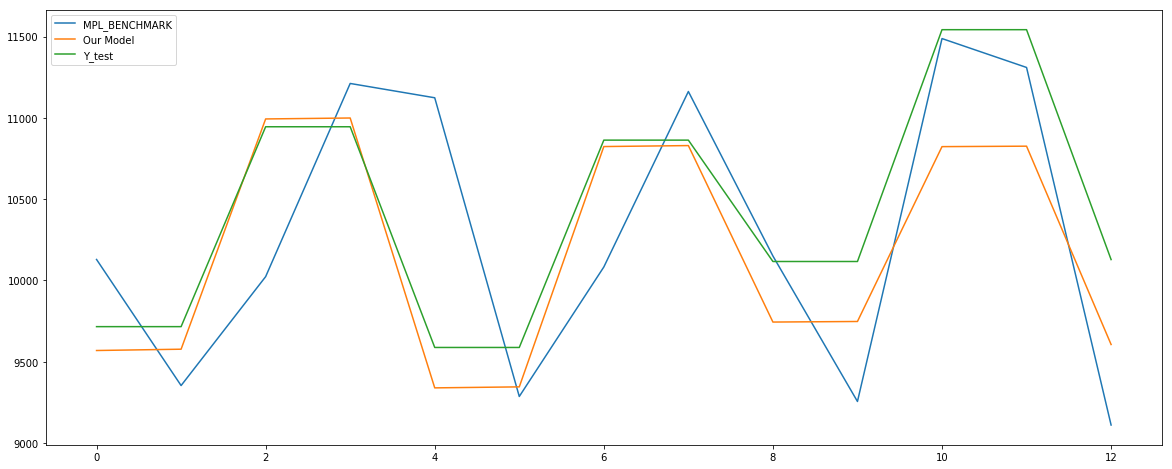

** NO PREPROCESSING ** 


Our Model:     Y_pred_mase =  2.107337635776407        Y_pred_smape =  0.024596190808461236 

MPL Benchmark:    MLP_mase =  6.527296473438801        MLP_smape =  0.0750336925034148 



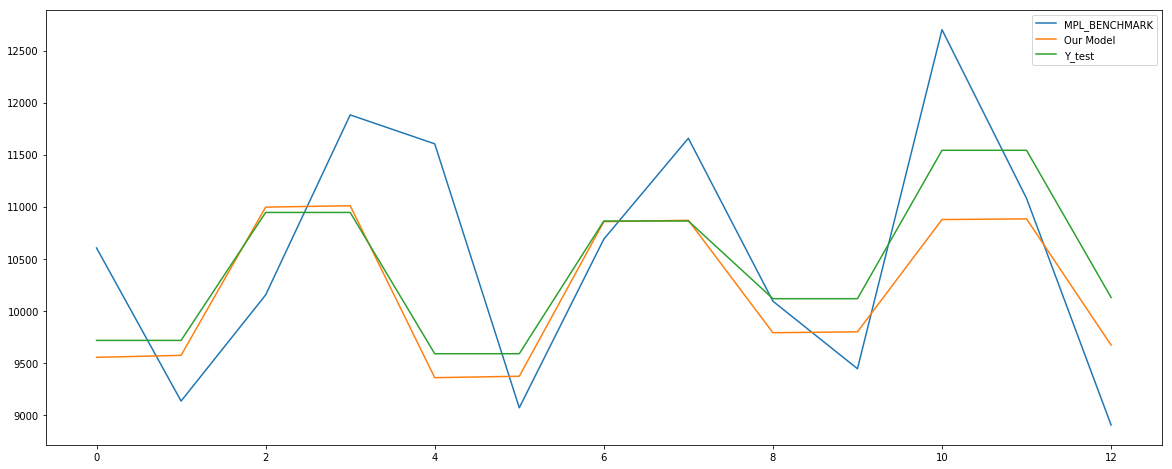

In [40]:

zt = Dataset.iloc[:,1]

one_ts_pred_compare(zt,30)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#===Comparison of our Model between 'with preprocessing' and 'no preprocessing'=====# 

** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


 Y_pred_mase =   1.8188508405151398
 Y_pred_smape =   0.007090696316890735 


** NO PREPROCESSING ** 


 Y_pred_mase =   1.4242619730024197
 Y_pred_smape =   0.005548651543572382 




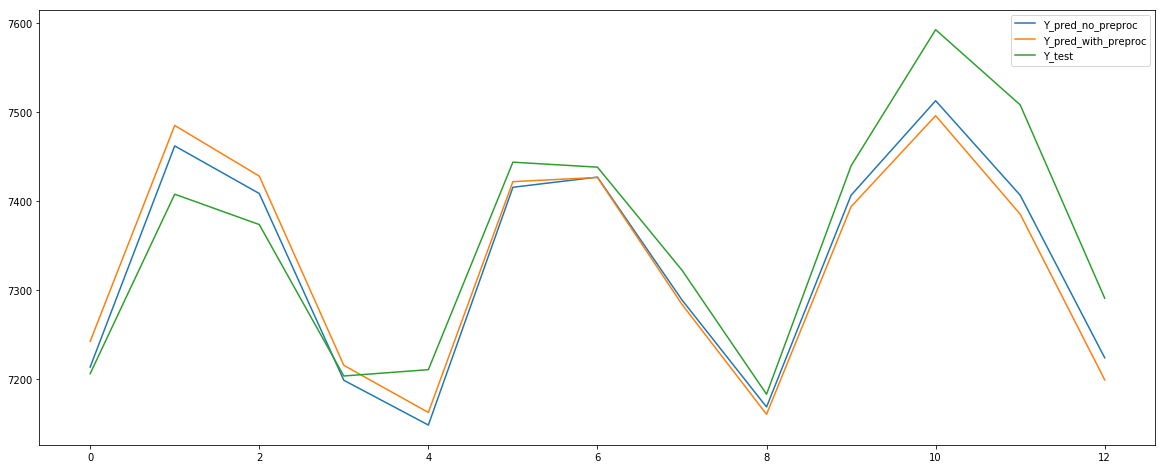

##=====  Comparison between our model and the Benchmark model =====##
** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


Our Model:     Y_pred_mase =  1.8188508405151398        Y_pred_smape =  0.007090696316890735 

MPL Benchmark:    MLP_mase =  5.190900533183553        MLP_smape =  0.020300794072396967 



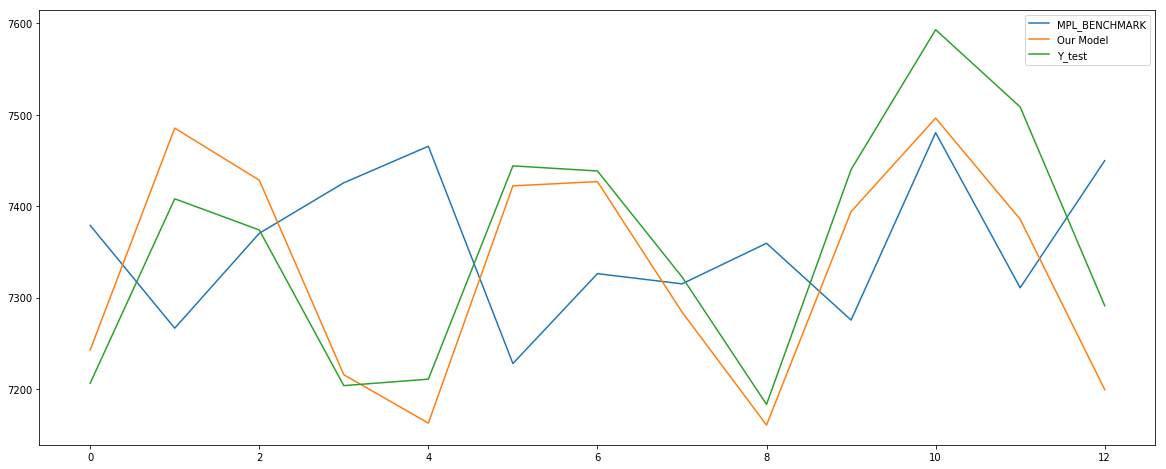

** NO PREPROCESSING ** 


Our Model:     Y_pred_mase =  1.4242619730024197        Y_pred_smape =  0.005548651543572382 

MPL Benchmark:    MLP_mase =  7.801433770625826        MLP_smape =  0.03011889124516322 



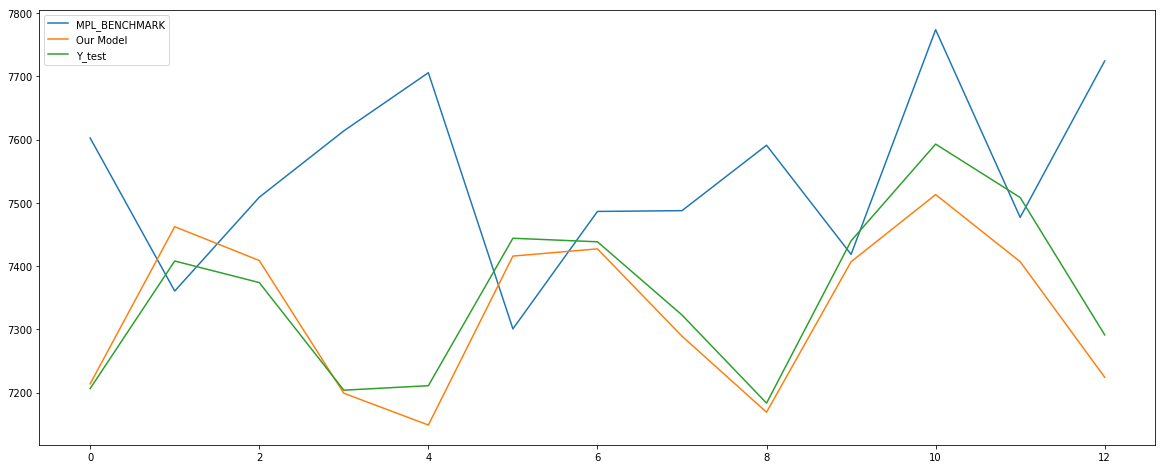

In [41]:
zt = Dataset.iloc[:,6]

one_ts_pred_compare(zt,30)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#===Comparison of our Model between 'with preprocessing' and 'no preprocessing'=====# 

** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


 Y_pred_mase =   10.415881516442324
 Y_pred_smape =   0.1431622782905895 


** NO PREPROCESSING ** 


 Y_pred_mase =   2.047083012763595
 Y_pred_smape =   0.026493988684191543 




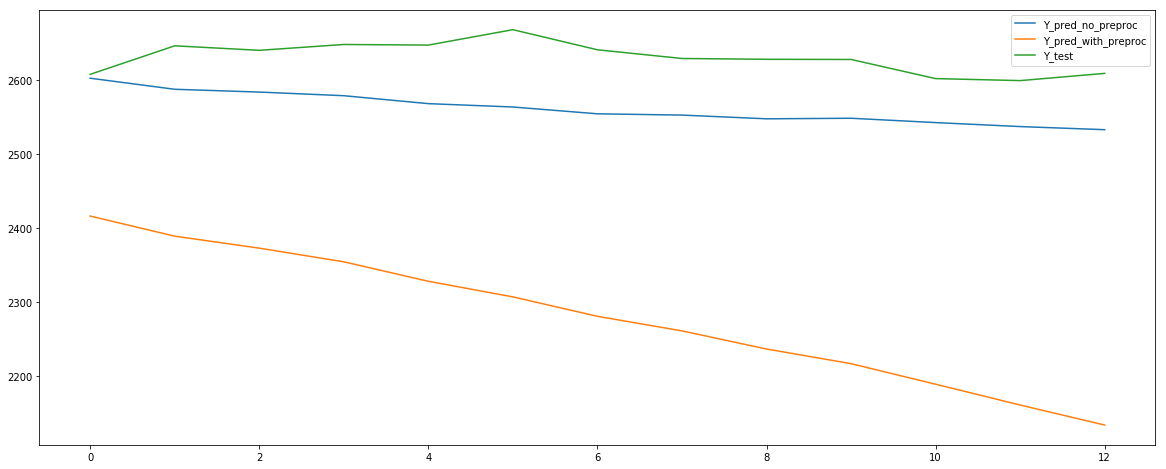

##=====  Comparison between our model and the Benchmark model =====##
** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


Our Model:     Y_pred_mase =  10.415881516442324        Y_pred_smape =  0.1431622782905895 

MPL Benchmark:    MLP_mase =  14.928583346164256        MLP_smape =  0.211655210052005 



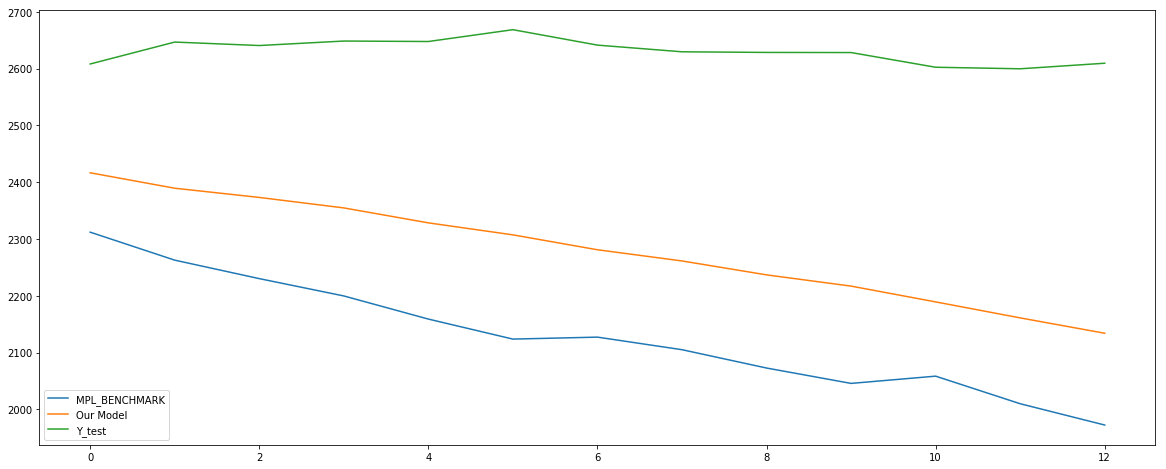

** NO PREPROCESSING ** 


Our Model:     Y_pred_mase =  2.047083012763595        Y_pred_smape =  0.026493988684191543 

MPL Benchmark:    MLP_mase =  7.4771964542550196        MLP_smape =  0.09045491775509065 



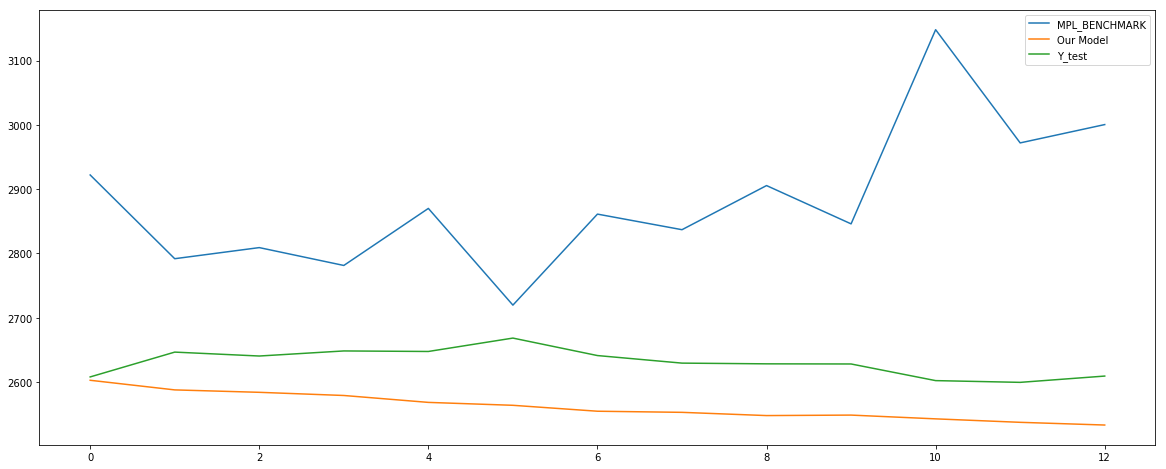

In [44]:
zt = Dataset.iloc[:,10]

one_ts_pred_compare(zt,30)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#===Comparison of our Model between 'with preprocessing' and 'no preprocessing'=====# 

** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


 Y_pred_mase =   4.834161652530981
 Y_pred_smape =   0.013263172516955031 


** NO PREPROCESSING ** 


 Y_pred_mase =   2.3926583561730914
 Y_pred_smape =   0.006534382055476268 




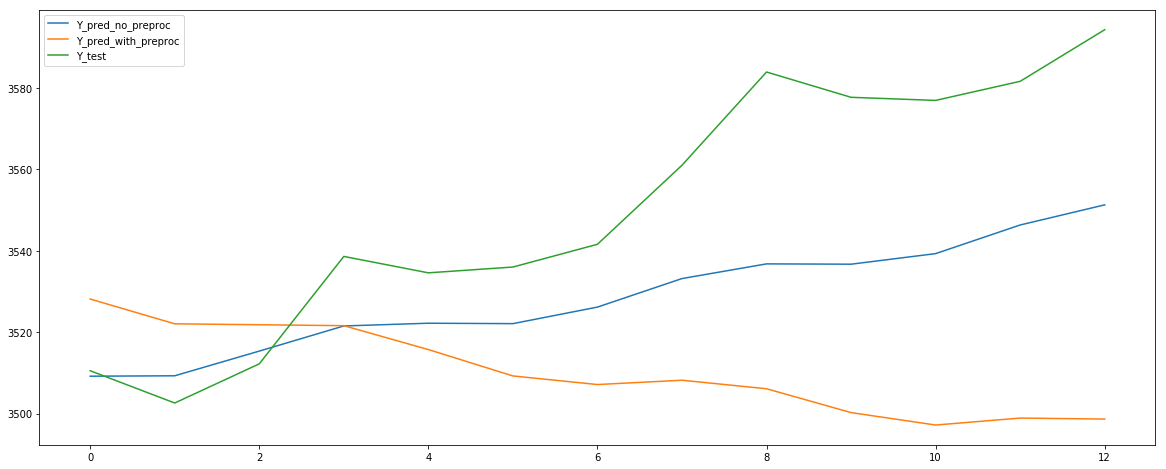

##=====  Comparison between our model and the Benchmark model =====##
** WITH PREPROCESSING (TREND AND SAISONNALITY) ** 


Our Model:     Y_pred_mase =  4.834161652530981        Y_pred_smape =  0.013263172516955031 

MPL Benchmark:    MLP_mase =  9.607212556463496        MLP_smape =  0.026573445629217037 



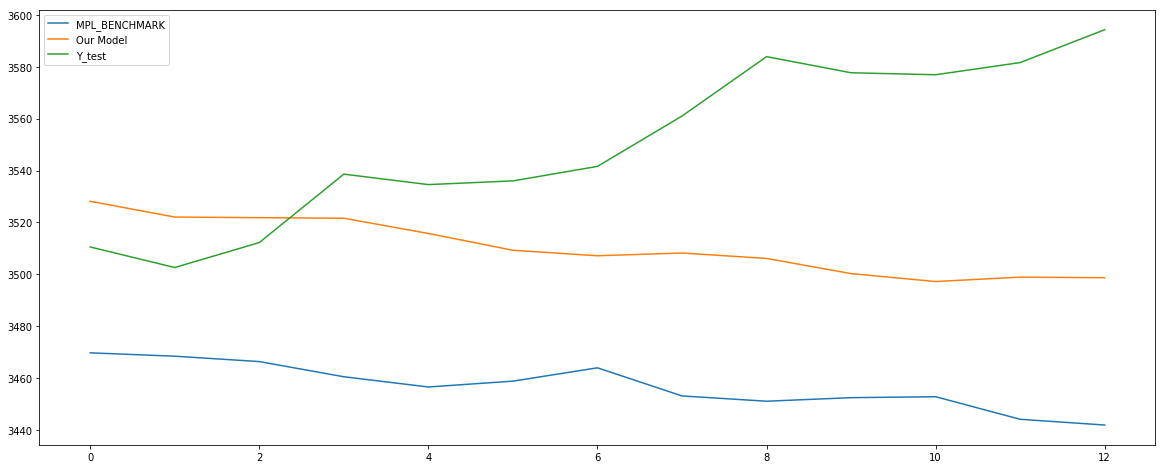

** NO PREPROCESSING ** 


Our Model:     Y_pred_mase =  2.3926583561730914        Y_pred_smape =  0.006534382055476268 

MPL Benchmark:    MLP_mase =  14.209099577087887        MLP_smape =  0.03803157694327165 



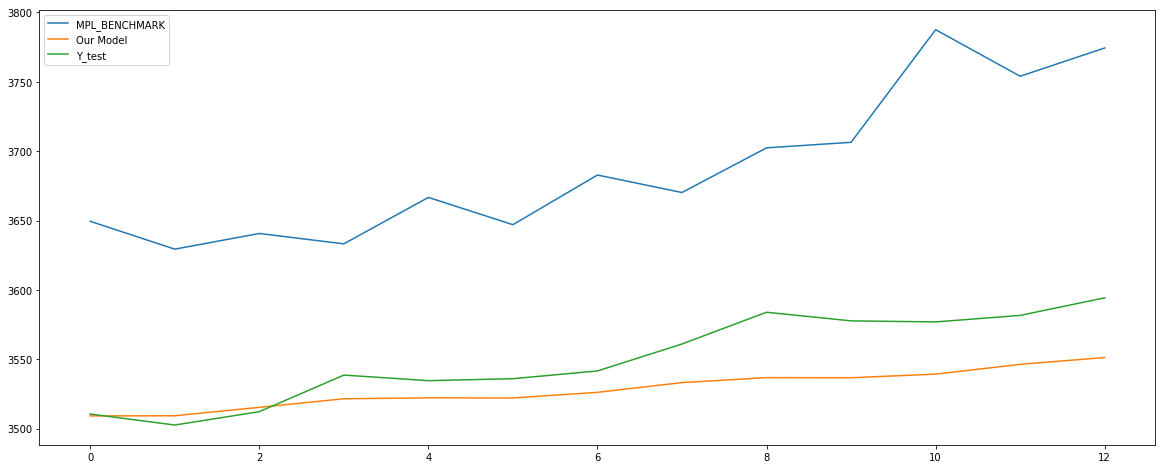

In [52]:
zt = Dataset.iloc[:,110]

one_ts_pred_compare(zt,30)

In [ ]:
##============ Neuronal Netzwerk and Deep Learning =====================### 

In [ ]:

def rnn_bench(x_train, y_train, x_test, fh, input_size):
    """
    Forecasts using 6 SimpleRNN nodes in the hidden layer and a Dense output layer
    :param x_train: train data
    :param y_train: target values for training
    :param x_test: test data
    :param fh: forecasting horizon
    :param input_size: number of points used as input
    :return:
    """
    # reshape to match expected input
    x_train = np.reshape(x_train, (-1, input_size, 1))
    x_test = np.reshape(x_test, (-1, input_size, 1))
    # create the model
    model = Sequential([
        SimpleRNN(6, input_shape=(input_size, 1), activation='linear',
                  use_bias=False, kernel_initializer='glorot_uniform',
                  recurrent_initializer='orthogonal', bias_initializer='zeros',
                  dropout=0.0, recurrent_dropout=0.0),
        Dense(1, use_bias=True, activation='linear')
    ])
    opt = rmsprop(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    # fit the model to the training data
    model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)
    # make predictions
    y_hat_test = []
    last_prediction = model.predict(x_test)[0]
    for i in range(0, fh):
        y_hat_test.append(last_prediction)
        x_test[0] = np.roll(x_test[0], -1)
        x_test[0, (len(x_test[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_test)[0]
    return np.asarray(y_hat_test)

In [ ]:
## ============== Convolution Neural Netzwerk ======================##

In [ ]:
def Conv_NN(x_train, y_train, x_test, fh, input_size):
    
    # reshape to match expected input
    x_train = np.reshape(x_train, (-1, input_size, 1))
    x_test = np.reshape(x_test, (-1, input_size, 1))
    # create the model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu')
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])
    # fit the model to the training data
    model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1,
          callbacks=[history])
    # make predictions
    y_hat_test = []
    last_prediction = model.predict(x_test)[0]
    for i in range(0, fh):
        y_hat_test.append(last_prediction)
        x_test[0] = np.roll(x_test[0], -1)
        x_test[0, (len(x_test[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_test)[0]
    return np.asarray(y_hat_test)

In [ ]:
#======================= LSTM Netzwork ==========================##

In [ ]:
def LSTM_NN(x_train, y_train, x_test, fh, in_back):
    
    # reshape to match expected input
    x_train = np.reshape(x_train, (-1, in_back, 1))
    x_test = np.reshape(x_test, (-1, in_back, 1))
    # create the model
    model = Sequential()
    model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the model to the training data
    model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1,
          callbacks=[history])
    # make predictions
    y_hat_test = []
    last_prediction = model.predict(x_test)[0]
    for i in range(0, fh):
        y_hat_test.append(last_prediction)
        x_test[0] = np.roll(x_test[0], -1)
        x_test[0, (len(x_test[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_test)[0]
    return np.asarray(y_hat_test)

In [ ]:
def one_ts_pred_neural_netzt(data: pd.DataFrame,in_back):
    '''
    this function split a dataset of one serie into training and testing Dataset, 
    train a mondel on the training dataset and make prediction on the test data. 
    it calculate the evaluation metric sMAPE and MASE of the prediction-it plots
    also the true values and the predicted values
    : data:     Dataset of the serie
    : in_back:  number of input point use to forcaste
    : return:  Y_test, Y_predict, sMAPE, MASE of each used model
    '''
    fh = 13             # forcasting horizon must be 18 for weekly data
    freq = 1            # the frequence of weekly data is 1
    
    # remove all Nan values from serie
    new_Data = remov_nan (data)
    
    
    
    # Split the dataset into x_train,y_train, x_test and y_test
    X_train,Y_train, X_test, Y_test = all_split(new_Data, fh, in_back)
    
    
    # make forcasting with Linear Regression
    Y_pred_RNN = rnn_bench(X_train, Y_train, X_test,fh, in_back)
    Y_pred_Conv_NN = Conv_NN(X_train, Y_train, X_test,fh, in_back)
    Y_pred_LSTM_NN = LSTM_NN(X_train, Y_train, X_test,fh, in_back)
    
    
    
    # check of the predicted values
    check_pred(new_Data,Y_pred_RNN)
    check_pred(new_Data,Y_pred_Conv_NN)
    check_pred(new_Data,Y_pred_LSTM_NN)
    
    
    # evaluation of the prediction for each model
    
    RNN_mase = mase(new_Data[:-fh],Y_test,Y_pred_RNN,freq)
    RNN_smape = smape(Y_test,Y_pred_RNN)
    
    
    Conv_NN_mase = mase(new_Data[:-fh],Y_test,Y_pred_Conv_NN,freq)
    Conv_NN_smape = smape(Y_test,Y_pred_Conv_NN)
    
    LSTM_NN_mase = mase(new_Data[:-fh],Y_test,Y_pred_LSTM_NN,freq)
    LSTM_NN_smape = smape(Y_test,Y_pred_LSTM_NN)

    

    #print of the evaluation metrics for each model and plotting of the prediction to compare with the real values
   
    print("Simple Recurrent Neuronal Netzwerk","\n")
    print(" RNN_mase =  ",RNN_mase)
    print(" RNN_smape =  ",RNN_smape, "\n\n")
    plot_prediction(Y_test,Y_pred_RNN)
    
    
    print("Convolution Neuronal Netzwerk","\n")
    print(" Conv_NN_mase =  ",Conv_NN_mase)
    print(" Conv_NN_smape =  ",Conv_NN_smape, "\n\n")
    plot_prediction(Y_test,Y_pred_Conv_NN)
    
    print("LSTM Neuronal Netzwerk","\n")
    print(" LSTM_NN_mase =  ",LSTM_NN_mase)
    print(" LSTM_NN_smape =  ",LSTM_NN_smape, "\n\n")
    plot_prediction(Y_test,Y_pred_LSTM_NN)
    
   
    

In [ ]:
zt = Dataset.iloc[:,10]

one_ts_pred_neural_netzt(zt,30)